In [1]:
from keras.layers import *
from keras.models import Sequential
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
#Dataset
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
(XTrain,YTrain),(XTest,YTest) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# Build a Model 

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))


model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

In [5]:
def preprocess_data(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    Y = to_categorical(Y)
    return X,Y

XTrain,YTrain = preprocess_data(XTrain,YTrain)
print(XTrain.shape,YTrain.shape)

XTest,YTest = preprocess_data(XTest,YTest)
print(XTest.shape,YTest.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [6]:
# Model Compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(XTrain,YTrain,epochs=20,validation_split=0.1,batch_size=128)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 73s 1ms/step - loss: 0.5834 - accuracy: 0.7811 - val_loss: 0.4564 - val_accuracy: 0.8517
Epoch 2/20
54000/54000 [==============================] - 72s 1ms/step - loss: 0.3699 - accuracy: 0.8624 - val_loss: 0.3518 - val_accuracy: 0.8743
Epoch 3/20
54000/54000 [==============================] - 72s 1ms/step - loss: 0.3155 - accuracy: 0.8832 - val_loss: 0.3159 - val_accuracy: 0.8867
Epoch 4/20
54000/54000 [==============================] - 77s 1ms/step - loss: 0.2884 - accuracy: 0.8939 - val_loss: 0.3200 - val_accuracy: 0.8948
Epoch 5/20
54000/54000 [==============================] - 72s 1ms/step - loss: 0.2658 - accuracy: 0.9004 - val_loss: 0.2700 - val_accuracy: 0.9037
Epoch 6/20
54000/54000 [==============================] - 71s 1ms/step - loss: 0.2489 - accuracy: 0.9065 - val_loss: 0.2809 - val_accuracy: 0.9012
Epoch 7/20
54000/54000 [==============================] - 71s 1ms/ste

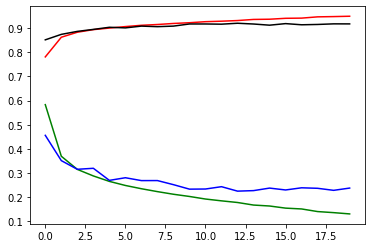

In [7]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [8]:
model.evaluate(XTest,YTest)

10000/10000 [==============================] - 3s 344us/step


[0.2546260567188263, 0.9107000231742859]

Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


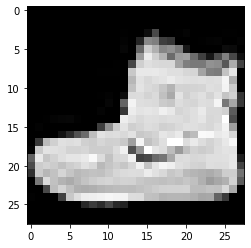

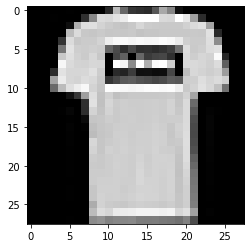

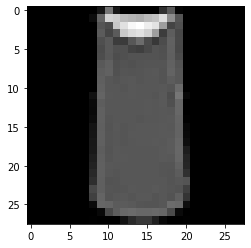

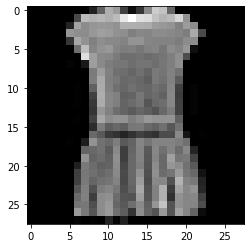

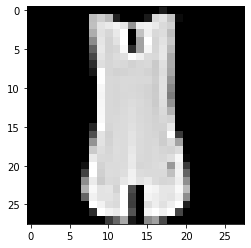

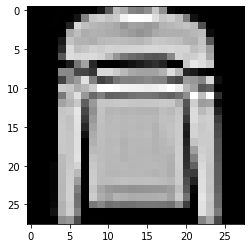

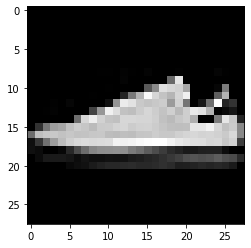

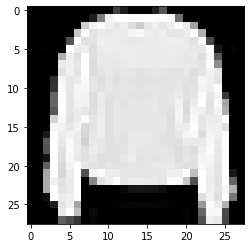

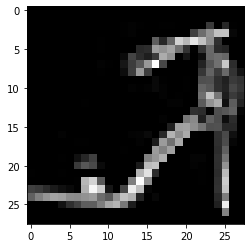

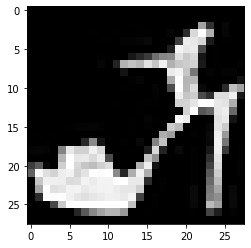

In [17]:
# example of loading the mnist dataset

# summarize loaded dataset
print('Train: X=%s, y=%s' % (XTrain.shape, YTrain.shape))
print('Test: X=%s, y=%s' % (XTest.shape, YTest.shape))
# plot first few images
for i in range(10):
    plt.imshow(XTrain[i].reshape(28,28),cmap='gray')
    plt.show()
plt.show()